In [2]:
import os
import shutil
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


# managing data

In [32]:
try:
    os.chdir('E:\\cnns\\digit_prediction')
    os.makedirs('training/0')
    os.makedirs('training/1')
    os.makedirs('training/2')
    os.makedirs('training/3')
    os.makedirs('training/4')
    os.makedirs('training/5')
    os.makedirs('training/6')
    os.makedirs('training/7')
    os.makedirs('training/8')
    os.makedirs('training/9')
except:
    pass

In [36]:
try:
    os.chdir('E:\\cnns\\digit_prediction')
    os.makedirs('testing/0')
    os.makedirs('testing/1')
    os.makedirs('testing/2')
    os.makedirs('testing/3')
    os.makedirs('testing/4')
    os.makedirs('testing/5')
    os.makedirs('testing/6')
    os.makedirs('testing/7')
    os.makedirs('testing/8')
    os.makedirs('testing/9')
except:
    pass

In [49]:
source_paths=[]
for i in range(0,10):
    source_paths.append('digit_'+str(i))
training_destination=[]
for j in range(0,10):
    training_destination.append('training/'+str(j))
testing_destination=[]
for k in range(0,10):
    testing_destination.append('testing/'+str(k))

In [51]:
def split_data(source,training_destination,testing_destination,split_size):
    files=os.listdir(source)
    size=len(files)
    training_size=split_size*size
    for i,file in enumerate(files):
        if i < training_size:
            shutil.copyfile(source+'/'+file,training_destination+'/'+file)
        else:
            shutil.copyfile(source+'/'+file,testing_destination+'/'+file)

In [52]:
for i in range(0,10):
    split_data(source_paths[i],training_destination[i],testing_destination[i],0.8)

In [76]:
training_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
rescale=1/255.,
zoom_range=0.2,
width_shift_range=0.2,
height_shift_range=0.2,
fill_mode='nearest')
training_data_generator=training_datagen.flow_from_directory(
'training',
class_mode='sparse',
target_size=(32,32))

Found 5473 images belonging to 10 classes.


In [88]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32,(3,3),input_shape=(32,32,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256,activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(10,activation='softmax'))
model.compile(
loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer=tf.keras.optimizers.RMSprop(lr=0.001),metrics=['acc'])

In [89]:
history=model.fit(training_data_generator,epochs=20,validation_data=testing_data_generator)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 172 steps, validate for 43 steps
Epoch 1/20
172/172 [==============================] - 22s 126ms/step - loss: 2.2490 - acc: 0.1570 - val_loss: 2.0923 - val_acc: 0.2676
Epoch 2/20
172/172 [==============================] - 19s 111ms/step - loss: 1.9369 - acc: 0.3218 - val_loss: 1.7586 - val_acc: 0.4098
Epoch 3/20
172/172 [==============================] - 20s 114ms/step - loss: 1.5402 - acc: 0.4736 - val_loss: 1.9393 - val_acc: 0.4773
Epoch 4/20
172/172 [==============================] - 19s 110ms/step - loss: 1.3073 - acc: 0.5668 - val_loss: 1.3784 - val_acc: 0.5638
Epoch 5/20
172/172 [==============================] - 19s 111ms/step - loss: 1.1287 - acc: 0.6342 - val_loss: 1.4114 - val_acc: 0.5887
Epoch 6/20
172/172 [==============================] - 19s 112ms/step - loss: 1.0192 - acc: 0.6684 - val_loss: 1.2702 - val_acc: 0.6136
Epoch 7/20
172/172 [==============================] - 19s 111ms/step - loss: 0.9198 - acc: 0.6963

In [64]:
testing_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
rescale=1/255.)
testing_data_generator=testing_datagen.flow_from_directory(
'testing',
class_mode='sparse',
target_size=(32,32))

Found 1364 images belonging to 10 classes.


In [79]:
model.evaluate(testing_data_generator,verbose=1)

  ...
    to  
  ['...']
43/43 [==============================] - 2s 46ms/step - loss: 1.3905 - acc: 0.6386


[1.3905418251836024, 0.63856304]

In [90]:
acc=history.history['acc']
val_accuracy=history.history['val_acc']

In [91]:
acc

[0.1569523,
 0.32176137,
 0.47359768,
 0.5667824,
 0.63420427,
 0.66837204,
 0.69632745,
 0.72611,
 0.7383519,
 0.76046044,
 0.7710579,
 0.78001094,
 0.786406,
 0.7929837,
 0.8037639,
 0.8023022,
 0.80595654,
 0.816554,
 0.82203543,
 0.8234972]

Text(0, 0.5, 'accuracy')

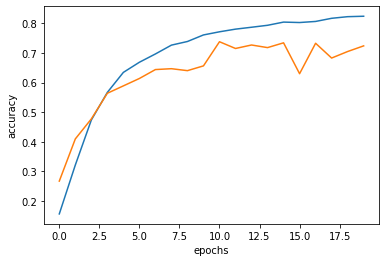

In [94]:
plt.plot(range(len(acc)),acc)
plt.plot(range(len(val_accuracy)),val_accuracy)
plt.xlabel('epochs')
plt.ylabel('accuracy')